<a href="https://colab.research.google.com/github/ashishkumar30/ML-AI-Python-Codes/blob/master/Bitcoin%20mining%20Cryptography%20Blockchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Bitcoin Mining

 Bitcoin mining is performed by high-powered computers that solve complex computational math problems; these problems are so complex that they cannot be solved by hand and are complicated enough to tax even incredibly powerful computers.

* Bitcoin mining is the process of creating new bitcoin by solving a computational puzzle.
* Bitcoin mining is necessary to maintain the ledger of transactions upon which bitcoin is based.
* Miners have become very sophisticated over the last several years using complex machinery to speed up mining operations.

##Block Chain

The block chain is a public record of Bitcoin transactions in chronological order. The block chain is shared between all Bitcoin users. It is used to verify the permanence of Bitcoin transactions and to prevent double spending.

##Block

A block is a record in the block chain that contains and confirms many waiting transactions. Roughly every 10 minutes, on average, a new block including transactions is appended to the block chain through mining.

##Cryptography

Cryptography is the branch of mathematics that lets us create mathematical proofs that provide high levels of security. Online commerce and banking already uses cryptography. In the case of Bitcoin, cryptography is used to make it impossible for anybody to spend funds from another user's wallet or to corrupt the block chain. It can also be used to encrypt a wallet, so that it cannot be used without a password.

##Hash function

Cryptographic hash functions generate a fixed-length character string from data records of any length. A data record can be a word, a sentence, a longer text or an entire file.
A cryptographic hash function is used for security purposes and constitutes the backbone of crypto security
A hash function turns a random input of data (keys) into a string of bytes with a fixed length and structure (hash value) 
The hash of a transaction makes it easy to identify transactions on the blockchain


##This is an Example to understand bitcoin mining - Blockchain using Python

install required libraries using pip 

In [ ]:
#pip install tabula-py

Filename

In [ ]:
filename="Bank_statment_ashish_icici.pdf"

##Import all required libraries

In [ ]:
import torch  # to check hardware GPU or CPU
import tabula # to read data from pdf
import time   # to calculate time
from PIL import Image  # to display image
from hashlib import sha256 # to generate hash function

##Load image to see all transactions

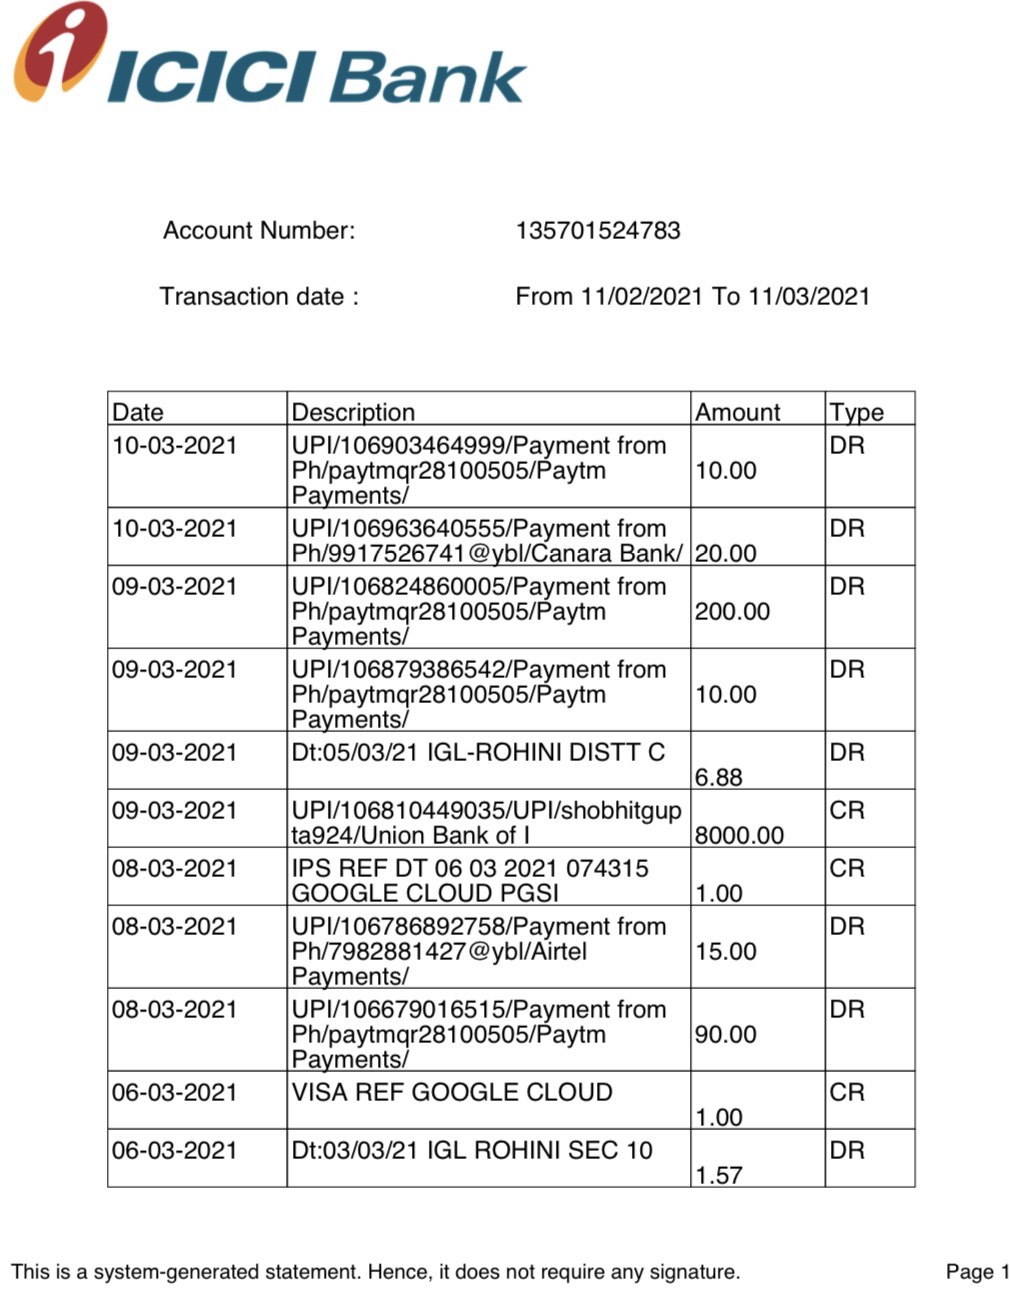

In [ ]:
img=Image.open('statment.jpg')
img

##Checking Hardware Present for mining: - GPU or CPU  

In [ ]:
gpu_available=torch.cuda.is_available()
print(gpu_available)
if gpu_available:
    print('GPU Available! Training on GPU')
else:
    print('GPU not Available! Training on CPU')

True
GPU Available! Training on GPU


##Read pdf of Bank statment and Extract data 

In [ ]:
all_transaction =tabula.read_pdf(filename, pages="all")
print("Data Extracted From Bank Statment")

Got stderr: Mar 11, 2021 7:11:42 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 11, 2021 7:11:42 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Data Extracted From Bank Statment


##Getting All Transactions

In [ ]:
all_transaction=all_transaction[0].fillna(" ")
all_transaction

,Date,Description,Amount,Type
0,10-03-2021,UPI/106903464999/Payment from\rPh/paytmqr28100...,10.00,DR
1,10-03-2021,UPI/106963640555/Payment from\rPh/9917526741@y...,20.00,DR
2,09-03-2021,UPI/106824860005/Payment from\rPh/paytmqr28100...,200.00,DR
3,09-03-2021,UPI/106879386542/Payment from\rPh/paytmqr28100...,10.00,DR
4,09-03-2021,Dt:05/03/21 IGL-ROHINI DISTT C,6.88,DR
5,09-03-2021,UPI/106810449035/UPI/shobhitgup\rta924/Union B...,8000.00,CR
6,08-03-2021,IPS REF DT 06 03 2021 074315\rGOOGLE CLOUD PGSI,1.00,CR
7,08-03-2021,UPI/106786892758/Payment from\rPh/7982881427@y...,15.00,DR
8,08-03-2021,UPI/106679016515/Payment from\rPh/paytmqr28100...,90.00,DR
9,06-03-2021,VISA REF GOOGLE CLOUD,1.00,CR


##Cleaning Transactions and converting them to string

In [ ]:
all_transaction_data = []
for single_trans in range(len(all_transaction)):
    single_transaction = " , ".join([str(change_str) for change_str in all_transaction.iloc[single_trans].to_list()]).replace("\r",' ').replace("/",' ')
    all_transaction_data.append(single_transaction)
all_transaction_data

['10-03-2021 , UPI 106903464999 Payment from Ph paytmqr28100505 Paytm Payments  , 10.0 , DR',
 '10-03-2021 , UPI 106963640555 Payment from Ph 9917526741@ybl Canara Bank  , 20.0 , DR',
 '09-03-2021 , UPI 106824860005 Payment from Ph paytmqr28100505 Paytm Payments  , 200.0 , DR',
 '09-03-2021 , UPI 106879386542 Payment from Ph paytmqr28100505 Paytm Payments  , 10.0 , DR',
 '09-03-2021 , Dt:05 03 21 IGL-ROHINI DISTT C , 6.88 , DR',
 '09-03-2021 , UPI 106810449035 UPI shobhitgup ta924 Union Bank of I , 8000.0 , CR',
 '08-03-2021 , IPS REF DT 06 03 2021 074315 GOOGLE CLOUD PGSI , 1.0 , CR',
 '08-03-2021 , UPI 106786892758 Payment from Ph 7982881427@ybl Airtel Payments  , 15.0 , DR',
 '08-03-2021 , UPI 106679016515 Payment from Ph paytmqr28100505 Paytm Payments  , 90.0 , DR',
 '06-03-2021 , VISA REF GOOGLE CLOUD , 1.0 , CR',
 '06-03-2021 , Dt:03 03 21 IGL ROHINI SEC 10 , 1.57 , DR']

##Using shah256 for generating 64 bit string

In [ ]:
# getting value of shah256
def converting_to_SHA256_(text):
    # converting text to shah256 and converting to ascii
    return sha256(text.encode("ascii")).hexdigest()

##Bitcoin Mining function

In [ ]:
def mining_function(block_number, transactions, previous_hash, difficulty):
    """
    Hash function consist of :- block_number + transactions + prev_hash + nonce
    block_number:- which block it is
    transactions:- the current transaction
    previous_hash:- value of previous hash
    difficulty:- we have to find string shah256 starting  from 00000 or no of given difficulty


    """

    # difficulty level to guess
    prefix_str = '0' * difficulty

    nonce = 0

    # starting time
    start = time.time()

    while True:
        # generate the text
        text = str(block_number) + transactions + previous_hash + str(nonce)

        # convert it to shah256
        new_hash = converting_to_SHA256_(text)

        # check the condition if condition is true then we found hash value BTC 
        if new_hash.startswith(prefix_str):
            # end time , or total time taken to find hash value from algorithm
            total_time = float((time.time() - start))

            print(f"Successfully mined bitcoins with nonce value: '{nonce}' for block: '{block_number}'")
            print(f"New Hash Value is: '{new_hash}'")
            print(f"Transactions for: '{transactions}'")
            print(f"Time taken for this mining is: {round(total_time / 60, 4)} minutes", "\n")

            break

        # increase nonce
        nonce = nonce + 1

    return new_hash


##Run function on all Transaction one by one and generate Hash value , Mine Bitcoin

Assume that evey transaction entry is ledger

In [ ]:
# defining previous hash
prev_hash = '0000000xa036944e29568d0cff17edbe038f81208fecf9a66be9a2b8321c6ec7'

# change difficulty level more then 20 to solve current is 6 for example 
difficulty = 6

# run loop which extract transaction one by one from Ledger and generate its hash value
for block_number, transactions in enumerate(all_transaction_data):
    # call mining function
    new_hash = mining_function(block_number, transactions, prev_hash, difficulty)

    # now new hash is found so change previous hash to new hash
    prev_hash = new_hash


Successfully mined bitcoins with nonce value: '12586784' for block: '0'
New Hash Value is: '0000005d538b377c09271b9f667e1d967515199d0afeb60a0c49022c07705873'
Transactions for: '10-03-2021 , UPI 106903464999 Payment from Ph paytmqr28100505 Paytm Payments  , 10.0 , DR'
Time taken for this mining is: 0.4389 minutes 

Successfully mined bitcoins with nonce value: '3277058' for block: '1'
New Hash Value is: '000000933278064f39c321d21285fcaf9af073269e3bd66e52712c0d3bf0f70b'
Transactions for: '10-03-2021 , UPI 106963640555 Payment from Ph 9917526741@ybl Canara Bank  , 20.0 , DR'
Time taken for this mining is: 0.1159 minutes 

Successfully mined bitcoins with nonce value: '15138499' for block: '2'
New Hash Value is: '0000009f12d9df71dfd93a2f94e6678a276ffb82b3896b8eac03635fc7098861'
Transactions for: '09-03-2021 , UPI 106824860005 Payment from Ph paytmqr28100505 Paytm Payments  , 200.0 , DR'
Time taken for this mining is: 0.5298 minutes 

Successfully mined bitcoins with nonce value: '2387786' 